<a href="https://colab.research.google.com/github/ir19stark28/BHARATINTERN/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flower Classifier

#### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
import pickle

# Exploratory data analysis

In [ ]:
#Load the dataset
df=pd.read_csv(r"C:\Users\galiy\BHARATINTERN\TASK3 ~IRIS\iris.csv",header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Column names
new_column = ['sepal length in cm', 'sepal width in cm ','petal length in cm', 'petal width in cm', 'class']
df.columns = new_column
df

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Dimension of the dataframe
df.shape

(150, 5)

In [ ]:
# All the columns
df.columns

Index(['sepal length in cm', 'sepal width in cm ', 'petal length in cm',
       'petal width in cm', 'class'],
      dtype='object')

In [ ]:
#summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#Datatypes of each column
df.dtypes

sepal length in cm    float64
sepal width in cm     float64
petal length in cm    float64
petal width in cm     float64
class                  object
dtype: object

In [ ]:
#description statistics
df.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#unique values present in target column
df["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Check proportion of each class

In [ ]:
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Balanced dataset

### Check for missing values

In [ ]:
df.isnull()
df.isnull().sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64

No missing value

## Data Visualisation

<Axes: xlabel='class', ylabel='count'>

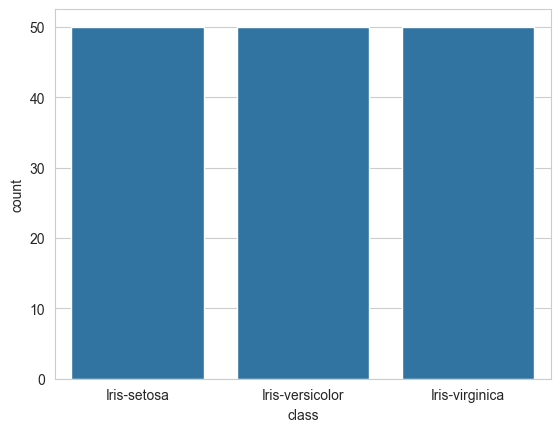

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='class',data=df)

Balanced

## Visualising different columns with respect to classes

<Axes: xlabel='sepal length in cm', ylabel='count'>

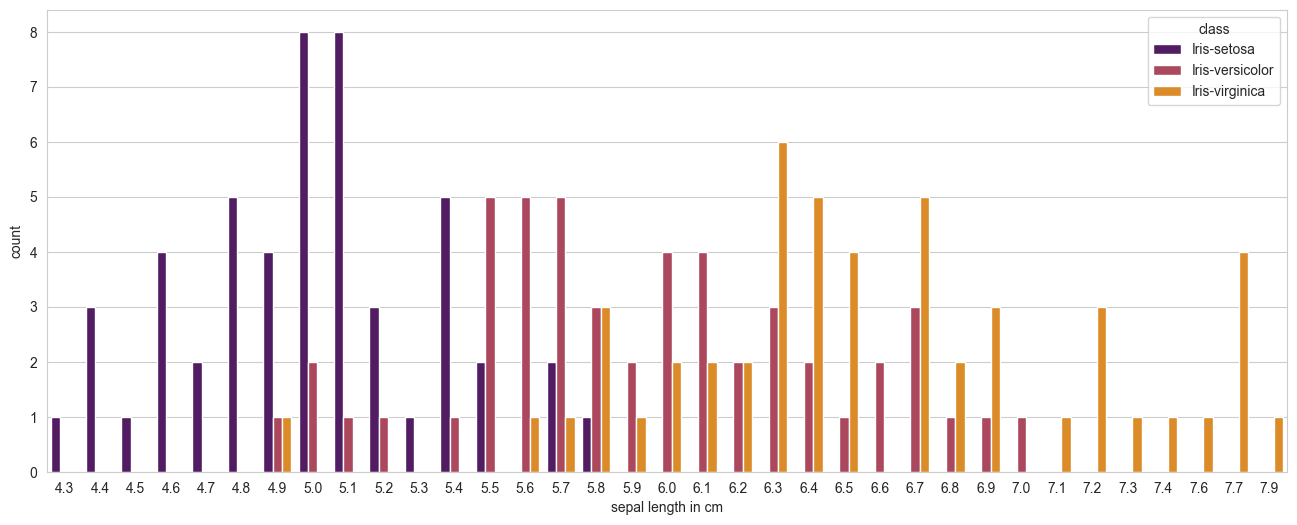

In [ ]:
plt.figure(figsize = (16,6))
sns.countplot(data=df, x="sepal length in cm", hue = "class", palette = 'inferno')

Density of Sentosa is more on lower sepal length and density of virginica is more on higher sepal length.

<Axes: xlabel='sepal width in cm ', ylabel='count'>

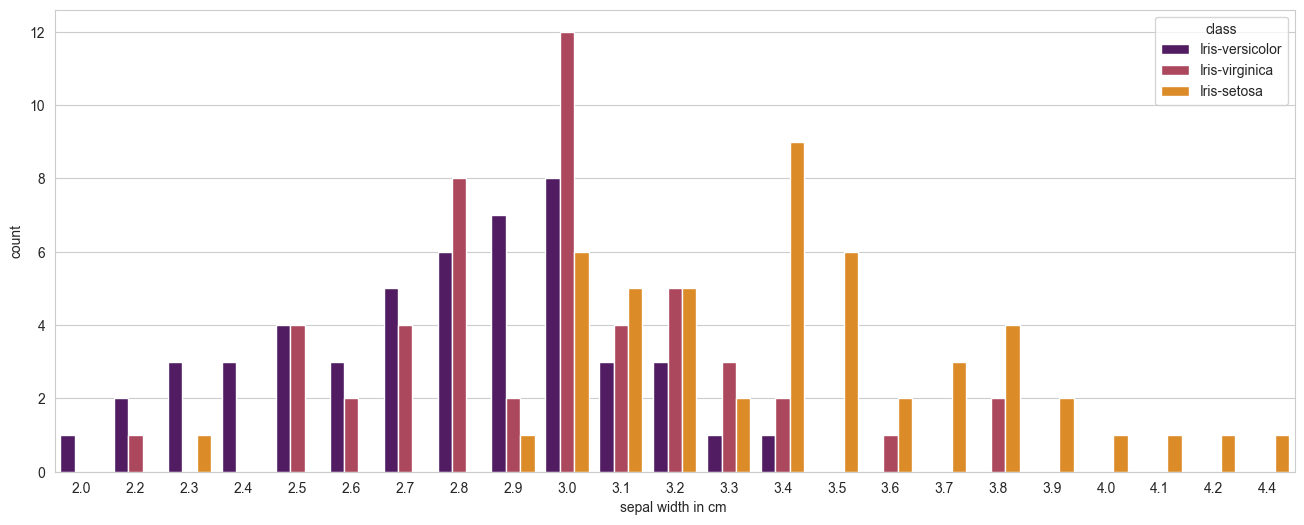

In [ ]:
plt.figure(figsize = (16,6))
sns.countplot(data=df, x="sepal width in cm ", hue = "class", palette = 'inferno')

Density of Sentosa is more on higher sepal width and density of versicolor is more on higher sepal width.

<Axes: xlabel='petal length in cm', ylabel='count'>

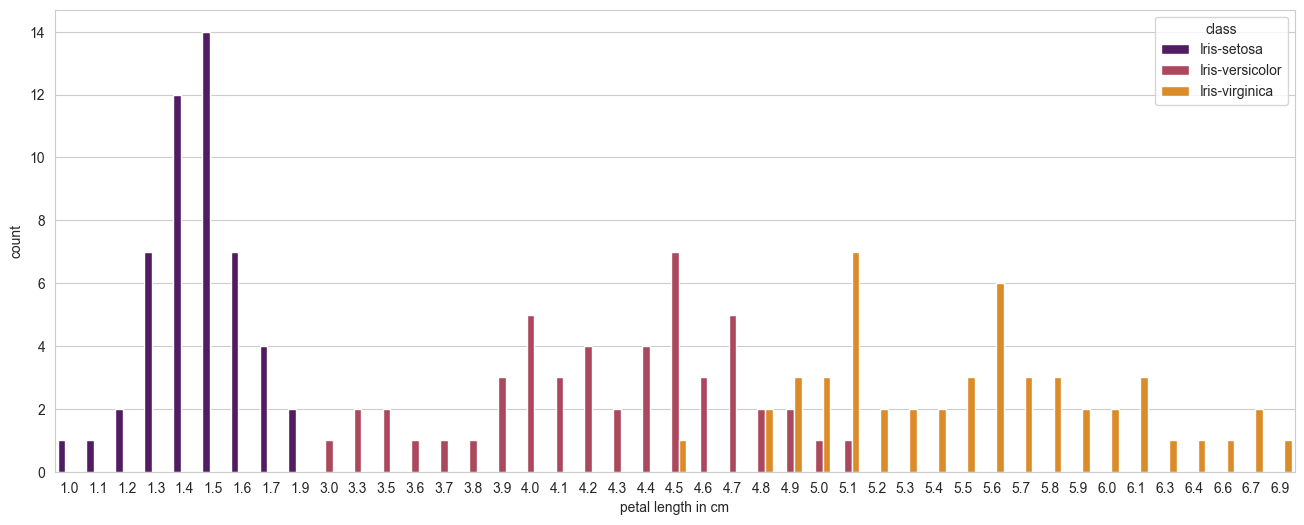

In [ ]:
plt.figure(figsize = (16,6))
sns.countplot(data=df, x="petal length in cm", hue = "class", palette = 'inferno')

Density of Sentosa is more on lower petal length and density of virginica is more on higher petal length.

<Axes: xlabel='petal width in cm', ylabel='count'>

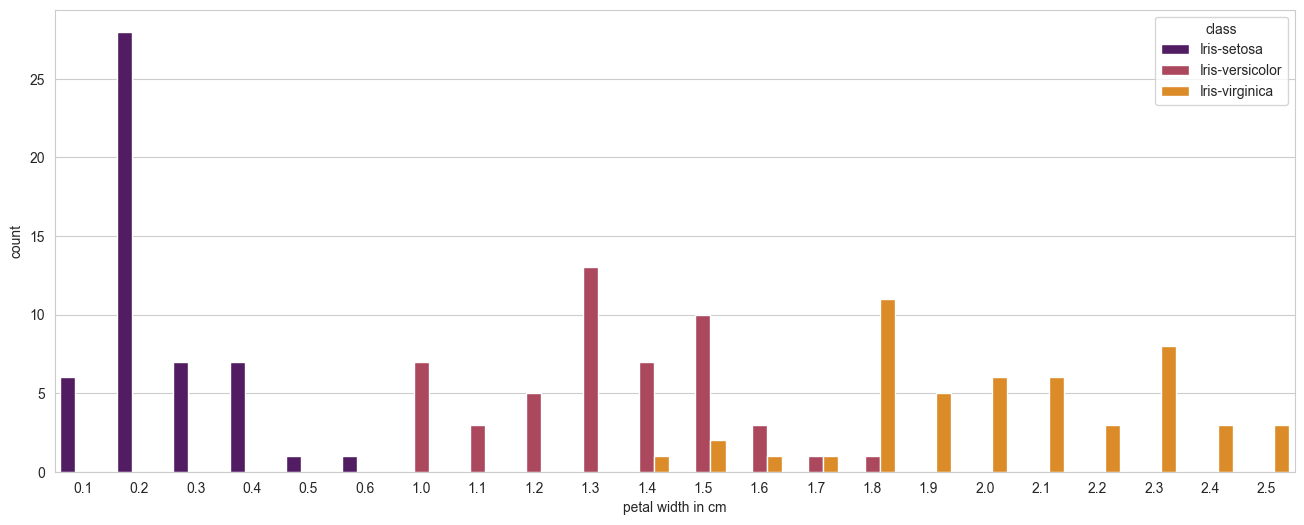

In [ ]:
plt.figure(figsize = (16,6))
sns.countplot(data=df, x="petal width in cm", hue = "class", palette = 'inferno')

Density of Sentosa is more on lower petal width and density of virginica is more on higher petal width.

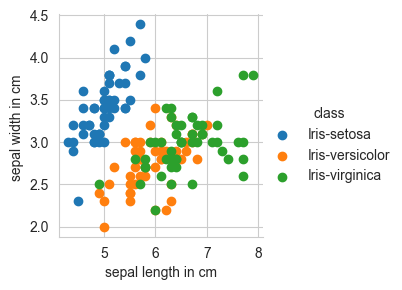

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='class').map(plt.scatter,'sepal length in cm' ,'sepal width in cm ').add_legend()

Setosa can be classify easily.

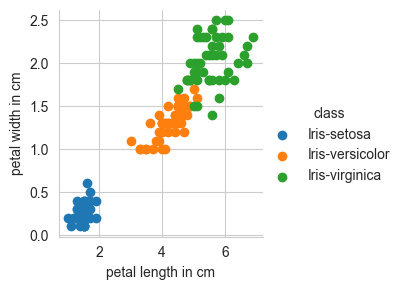

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='class').map(plt.scatter,'petal length in cm' ,'petal width in cm').add_legend()

## Relationship of features with each other

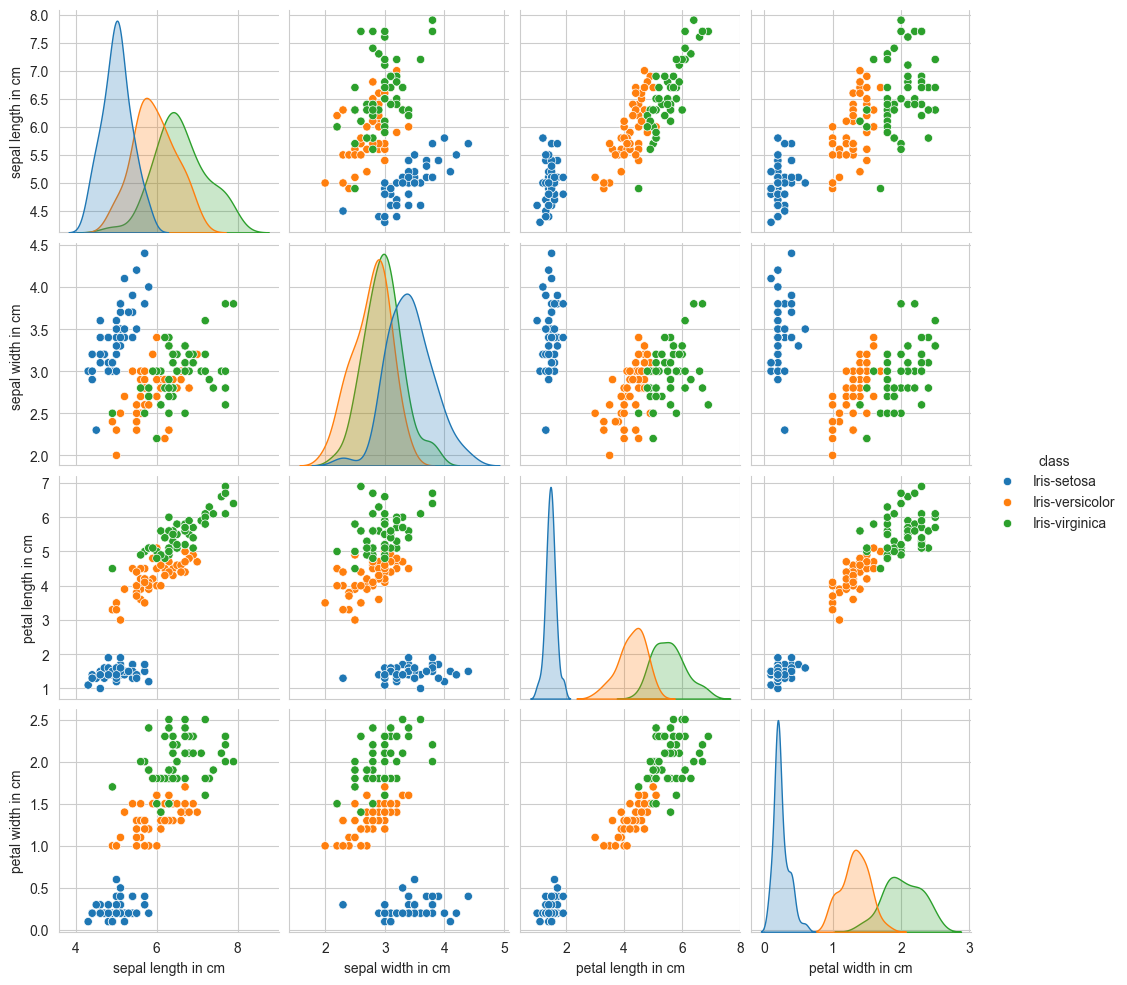

In [ ]:
# Visualise the whole dataset
sns.pairplot(df, hue='class')

Iris Setosa is easily distinguishable.

Iris Setosa has  higher Sepal length.

Iris Setosa has  lower Sepal width.

Iris Setosa has  higher Petal length.

Iris Setosa has  higher Petal width.


### Histogram for four numerical features

<Axes: >

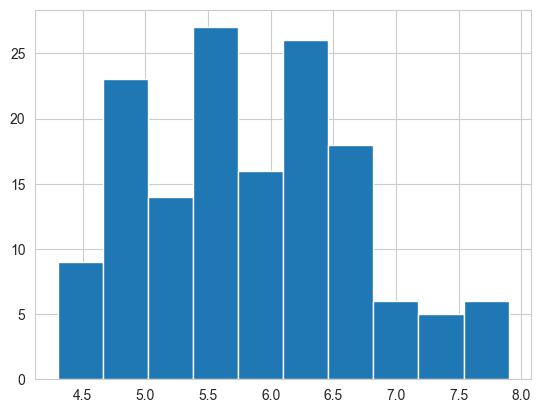

In [ ]:

df['sepal length in cm'].hist()

<Axes: >

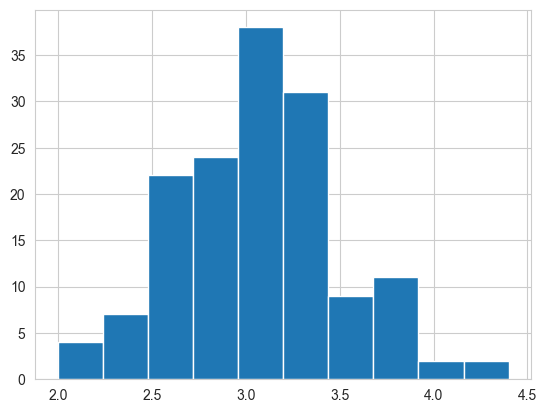

In [ ]:
# Plot graph for each column
df['sepal width in cm '].hist()

<Axes: >

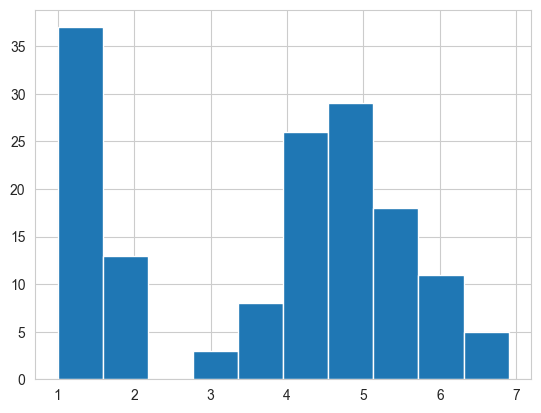

In [ ]:
# Plot graph for each column
df['petal length in cm'].hist()

<Axes: >

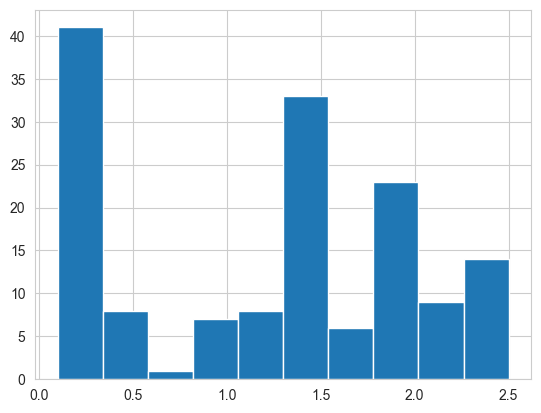

In [ ]:

# Plot graph for each column
df['petal width in cm'].hist()

### Box Plot

Text(0.5, 1.0, 'Boxplot of Sepal length')

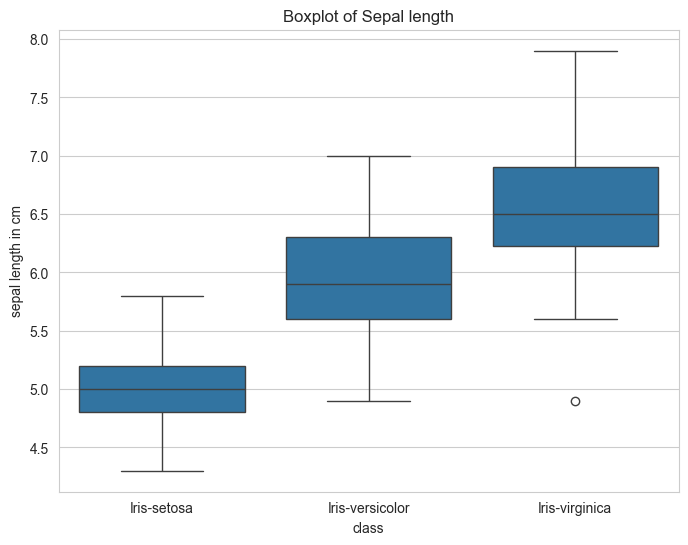

In [ ]:
# To Check the Outliers
plt.figure(figsize=[8,6])
sns.boxplot(x="class",y="sepal length in cm",data=df)
plt.title("Boxplot of Sepal length")

No outliers

Text(0.5, 1.0, 'Boxplot of Sepal width')

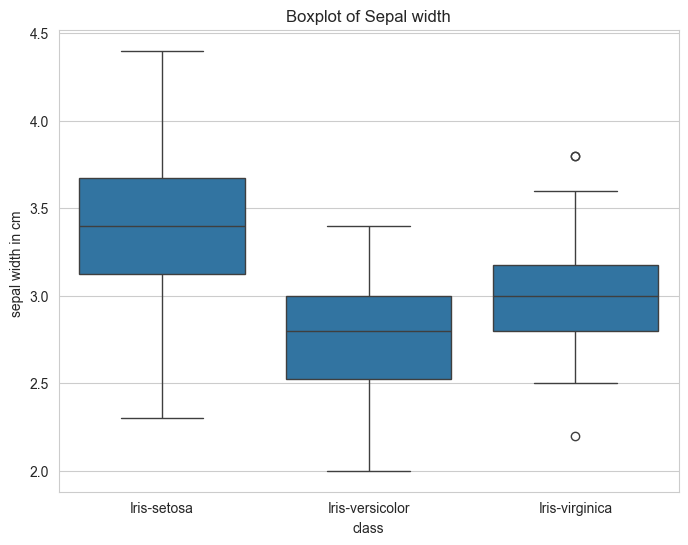

In [ ]:
# To Check the Outliers
plt.figure(figsize=[8,6])
sns.boxplot(x="class",y="sepal width in cm ",data=df)
plt.title("Boxplot of Sepal width")

Outlier is present

Text(0.5, 1.0, 'Boxplot of Petal length')

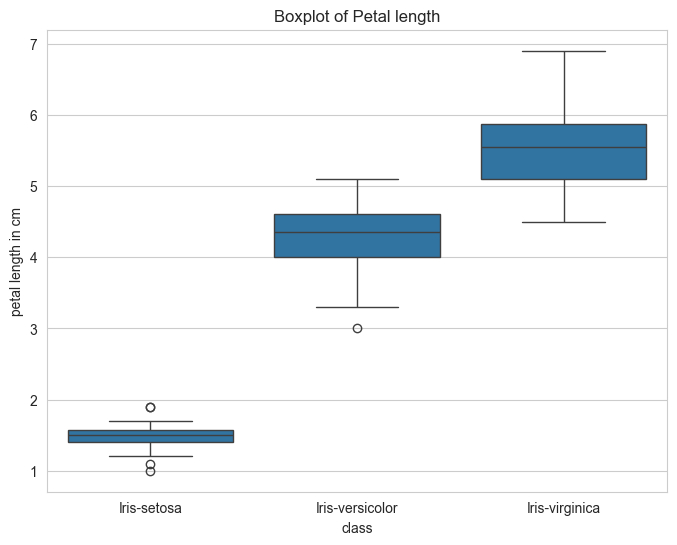

In [ ]:
# To Check the Outliers
plt.figure(figsize=[8,6])
sns.boxplot(x="class",y="petal length in cm",data=df)
plt.title("Boxplot of Petal length")

No Outlier

Text(0.5, 1.0, 'Boxplot of Petal width')

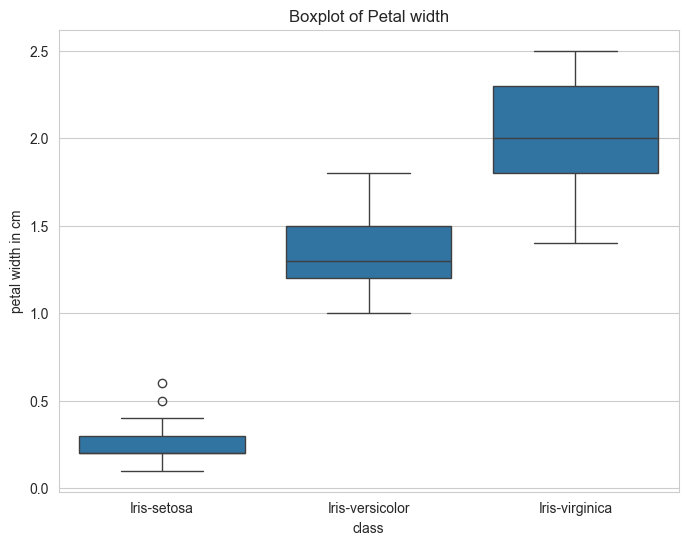

In [ ]:
# To Check the Outliers
plt.figure(figsize=[8,6])
sns.boxplot(x="class",y="petal width in cm",data=df)
plt.title("Boxplot of Petal width")

Outlier is present

## Correlation metrics

#### Correlation between the numerical variables

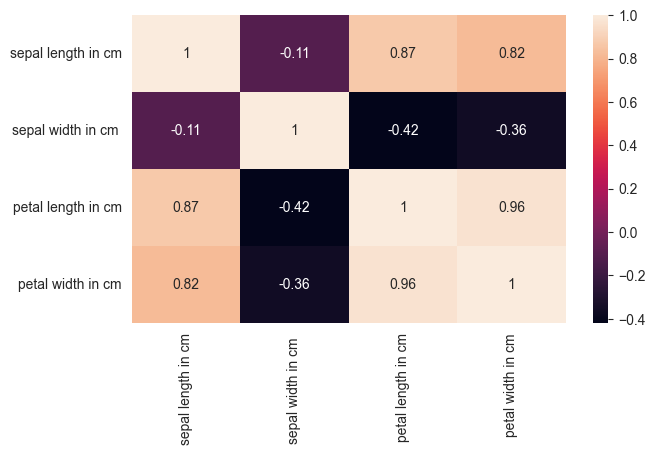

In [ ]:
plt.figure(figsize=(7,4))
d=df.iloc[:,0:4]
sns.heatmap(d.corr(),annot=True)
plt.show()

There is negative correlation between sepal-length and sepal-width, petal length and sepal width, petal width and sepal width.
petal length and petal width are highly correlated.

# Data Preprocessing

### Label Encoder

In [ ]:
#Catergorical Feature to Integer

for column in df.columns:
    if df[column].dtype== np.number:
        continue
df[column] = LabelEncoder().fit_transform(df[column])

C:\Users\galiy\AppData\Local\Temp\ipykernel_2044\2875155213.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype== np.number:


In [ ]:
df['class'].unique()

array([0, 1, 2])

In [ ]:
df.dtypes

sepal length in cm    float64
sepal width in cm     float64
petal length in cm    float64
petal width in cm     float64
class                   int32
dtype: object

In [ ]:
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Splitting of Dataset

In [ ]:
X = df.drop(['class'], axis=1)
y = df['class']


Features and target are separated

In [ ]:
X

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int32

In [ ]:
#Dimension of the dataset
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


70 percent training, 30 percent testing

### Normalize the numerical variables

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model

[1.0, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777]


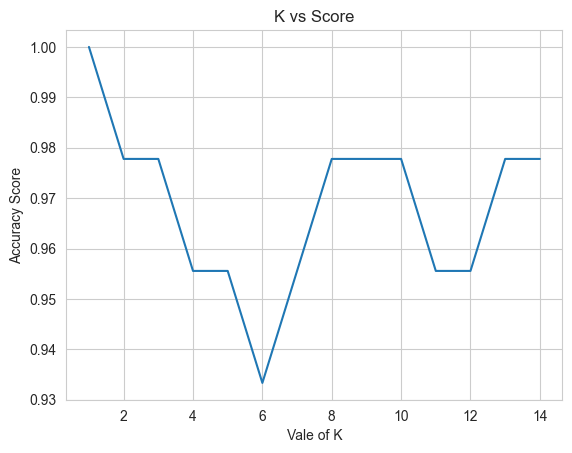

In [ ]:
# To check the best value of K
k_range = list(range(1,15))
acc = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))
print(acc)
plt.plot(k_range,acc)
plt.xlabel('Vale of K')
plt.ylabel('Accuracy Score')
plt.title('K vs Score')
plt.show()

Accuracy of the model is 97% for K=8

### Accuracy of the model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8).fit(X_train , y_train)
y_pred = knn.predict(X_test)
knn_acc=accuracy_score(y_test, y_pred)
print(knn_acc)

0.9777777777777777


Accuracy of the model is 97.78%

### Classification Report

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
print(metrics.confusion_matrix(y_test,y_pred))

[[17  0  0]
 [ 0 12  0]
 [ 0  1 15]]


### Prediction

In [ ]:
y_pred = knn.predict(X_test)
print(y_pred)

[1 0 2 0 0 2 0 1 0 2 0 2 2 2 1 1 1 0 0 1 1 1 0 1 0 0 2 0 0 1 2 2 2 2 0 0 1
 2 1 1 0 2 2 0 2]


0:Iris-setosa
1:Iris-versicolor
2:Iris-virginica  

#### Prediction on new data

In [ ]:
new_data = pd.DataFrame({
   'sepal length in cm' : [5.1],
    'sepal width in cm ': [3.5],
    'petal length cm': [1.4],
    'petal width cm': [0.2]
})

scaler = StandardScaler()
scaled_new_data = scaler.fit_transform(new_data)

predicted_species = knn.predict(scaled_new_data)

print(f"The predicted species is {predicted_species}")

The predicted species is [1]


## Saving the model

In [ ]:

filename = 'KNN_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(knn, file)


## Testing the saved Model

In [ ]:
with open(filename, 'rb') as file:
    loaded_knn_model = pickle.load(file)
# Make predictions using the loaded model
y_pred = loaded_knn_model.predict(X_test)
print(y_pred)

# Calculate accuracy
knn_acc = accuracy_score(y_test, y_pred)
print("Accuracy of loaded KNN model:", knn_acc)

[1 0 2 0 0 2 0 1 0 2 0 2 2 2 1 1 1 0 0 1 1 1 0 1 0 0 2 0 0 1 2 2 2 2 0 0 1
 2 1 1 0 2 2 0 2]
Accuracy of loaded KNN model: 0.9777777777777777
